In [1]:
#for now - use caiman kernel
#https://caiman.readthedocs.io/en/master/core_functions.html

In [2]:
import pickle
from pathlib import Path
import pandas as pd 
import os
import sys
import matplotlib.pyplot as plt
import getpass
#import scipy.signal as signal
import numpy as np
import caiman

/anaconda3/envs/caiman/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/caiman/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/caiman/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/caiman/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [3]:
#add the github path that will run the notebooks: 
username = getpass.getuser() # gets the username from the current comp 
print (username)

gilmandelbaum


In [4]:
sys.path.insert(0,'/Users/{:}/github/analysis-pipeline-for-photometry_ex/Nb_data_set/1.data_set_lineplot'.format(username))

In [5]:
sys.path[0]

'/Users/gilmandelbaum/github/analysis-pipeline-for-photometry_ex/Nb_data_set/1.data_set_lineplot'

In [6]:
import data_set_lineplot_ic_together_helper_functions as dslhf

In [7]:
sys.path.append('/Users/{}/GitHub/CaImAn/caiman/source_extraction/cnmf/'.format(username))
import deconvolution

In [8]:
seq_str = '0a1b2a3h4abcd5a6a7a'
period_of_interest = "choice_lick_label_50_sec"
HowManyBasck=1
folderName="right_dual_color_photo_full_data_after_QC" #folder where the plot data_set will be saved 
path = "/Volumes/GilInVivoPaper.large/2.Photometry_in_str/1.lateral_medial_6_analysis"

# Folder name of analysis: 

In [9]:
analysis_type ="full_session_traces_deconvalution"

In [10]:
sys.executable

'/anaconda3/envs/caiman/bin/python'

# Import the data and where to save it 

In [11]:
path_to_save = path+"/"+folderName+"/"+seq_str #also for loading

In [12]:
path_to_save

'/Volumes/GilInVivoPaper.large/2.Photometry_in_str/1.lateral_medial_6_analysis/right_dual_color_photo_full_data_after_QC/0a1b2a3h4abcd5a6a7a'

# Import the data table and data

In [13]:
MasterSheetName = "3.lateral_ medial_6_lateral_channels_final"
Mouse_Date_FileName = pd.read_excel(path+'/'+MasterSheetName+'.xlsx')
Mouse_Date_FileName

mouse    date    file name
0   T163  181207  T163-123432
1   T163  181128  T163-115220
2   T163  181203  T163-115901
3   T163  181130  T163-133215
4   T163  181204  T163-114628
..   ...     ...          ...
70  T202  190530  T202-152554
71  T202  190522  T202-141516
72  T202  190529  T202-160644
73  T202  190526  T202-142728
74  T202  190516  T202-165613

[75 rows x 3 columns]

In [14]:
%%time
root = Path(path_to_save)
d = "data_object_photometry_after_down_sampling"+"_"+seq_str+'.pickle'
my_path = root / d 
fileToOpen = open(my_path, 'rb')
data_set = pickle.load(fileToOpen)

CPU times: user 1.09 s, sys: 2.66 s, total: 3.75 s
Wall time: 48.7 s


# make a list to add to plots 

In [15]:
Mouse_Date_FileName['date'] = Mouse_Date_FileName['date'].apply(str)
Mouse_Date_FileName['mouse_session'] = Mouse_Date_FileName[['mouse','date']].apply(lambda x: '-'.join(x), axis=1)
session_date= list(Mouse_Date_FileName['mouse_session']) #session list

# Make the y axis label 

In [16]:
y_axis_list = ["df_f_10",
               "df_f_10_z_score",
               "df_f_10_z_score_sliding_window",
               "df_f_10_z_score_smooth1sec",
               "df_f_10_diff",
               "df_f_10_deconv",
               "df_f_1",
               "df_f_1_smooth1sec",
               "df_f_1_smooth150ms"]

In [18]:
alphabet = ["a","b","c","d","e","f","g","h"]
y_axis = y_axis_list[alphabet.index(seq_str[:seq_str.index('4')][-1])]
print (y_axis)

df_f_1_smooth1sec


# Folder to save the data:

In [19]:
# stash result in a cache directory, for how many back. 
cache_dir_plt = os.path.join(path_to_save,analysis_type,period_of_interest)
if not os.path.exists(cache_dir_plt):
    os.makedirs(cache_dir_plt)

In [20]:
cache_dir_plt

'/Volumes/GilInVivoPaper.large/2.Photometry_in_str/1.lateral_medial_6_analysis/right_dual_color_photo_full_data_after_QC/0a1b2a3h4abcd5a6a7a/full_session_traces_deconvalution/choice_lick_label_50_sec'

In [21]:
keys = ["d2 R","d1 R","d2 L","d1 L"]

In [22]:
# def smoooting_function (data_set,keys):
#     #make the window 
#     data_set_smoothing = []
#     M = 200
#     window = np.ones(M)
#     window /= sum(window)
#     for session in data_set:
#         for channel_name in keys:
#             channel_data = session[channel_name]
#             channel_data_padded = np.pad(channel_data,(M // 2, M // 2 - 1),'edge')
#             session[channel_name+"_smooth"] = np.convolve(channel_data_padded,window,mode='valid')
#         data_set_smoothing.append(session)
#     return (data_set_smoothing)

In [23]:
# cR, blR, c1R, gR, snR, spR, lamR = deconvolution.constrained_foopsi(downsampledR, \
#                                                                     p=1,bas_nonneg=True)

In [24]:
def deconvolve_function (data_set,keys):
    data_set_deconv = []
    for session in data_set:
        
        for channel_name in keys:
            channel_data = np.array(session[channel_name])
            deconv = deconvolution.constrained_foopsi(channel_data, p=1,bas_nonneg=True)
            session[channel_name+"_deconv"] = 35*deconv[5]
        data_set_deconv.append(session)
    return (data_set_deconv)

In [25]:
%%time
data_set_deconvolve = deconvolve_function(data_set,keys)

CPU times: user 44.7 s, sys: 11.7 s, total: 56.4 s
Wall time: 56.8 s


# What state(s) to show on the plot:

In [26]:
# state_Selection =[(39, 47), (47, 48), (48, 48), (48, 49)]
#state_Selection=[(48, 50)]
state_Selection=[(38, 39)]

In [27]:
def plot_cue_photo_per_session(data_set_l,session_date_l,states_l,keys):
    
    for data,date in zip(data_set_l,session_date_l):
        
        path_to_plot=cache_dir_plt+"/"+str(date)+"_"+seq_str[:seq_str.index("4")]+"_plot"
        print(date+" is being plotted")

        time_stamp =find_time_stamps(data,states_l)
        
        plot_time_stamp_photo(data,time_stamp,path_to_plot,keys)

        
    return ()

In [28]:
def find_time_stamps(data,states_list):
    time_bin_list=[]
    
    for state in states_list:
        state_start=state[0]
        state_end=state[1]
        rows = data[(data['iState_start']==state_start) & (data['iState_end']==state_end)]
        indexes = list(rows.index)
        time_bin_list.extend(indexes)

    return time_bin_list

In [29]:
def plot_time_stamp_photo(data,time_stamp, path_to_plot,keys):
    fig, ax = plt.subplots(4, 1,figsize=(10,10),sharex=True, sharey=False)
    
    for _ax, k in zip(ax.flatten(), keys):
        k_filter = k+"_deconv"
        
        _ax.plot(list(range(len(data[k]))), data[k])
        
        _ax.plot(list(range(len(data[k_filter]))), data[k_filter])
        
        _ax.set_title(k.split('_')[0])
        _ax.axhline(y=-1,color='k',linewidth=0.5)
        _ax.axhline(y=2,color='k',linewidth=0.5)
        #_ax.axhline(y=0,color='r',linewidth=1,linestyle="--")
        _ax.set_ylim(-2.5,4)
        _ax.set_xlim(100000,105000)
        
        for time in time_stamp:
            _ax.axvline(x=time,linewidth=1, color='g',linestyle="--")
        
        
    _ax.set_xlabel('Time(ms)')
    _ax.set_ylabel(y_axis)
   
    fig.savefig(path_to_plot+'.pdf')
    plt.show()

T163-181207 is being plotted


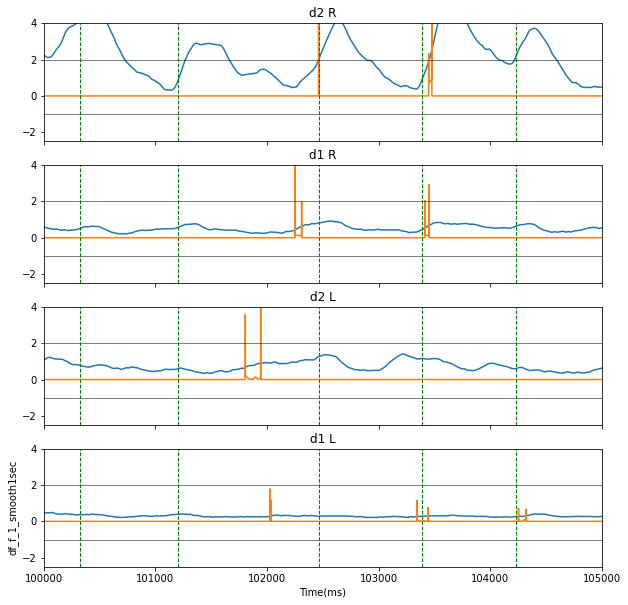

T163-181128 is being plotted


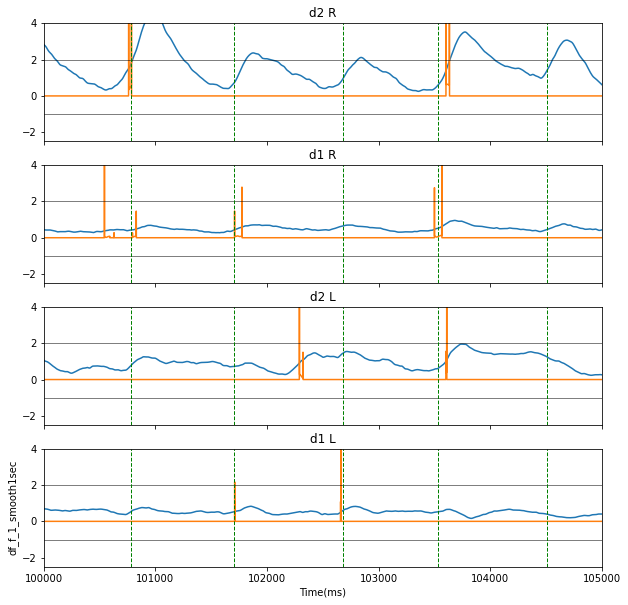

T163-181203 is being plotted


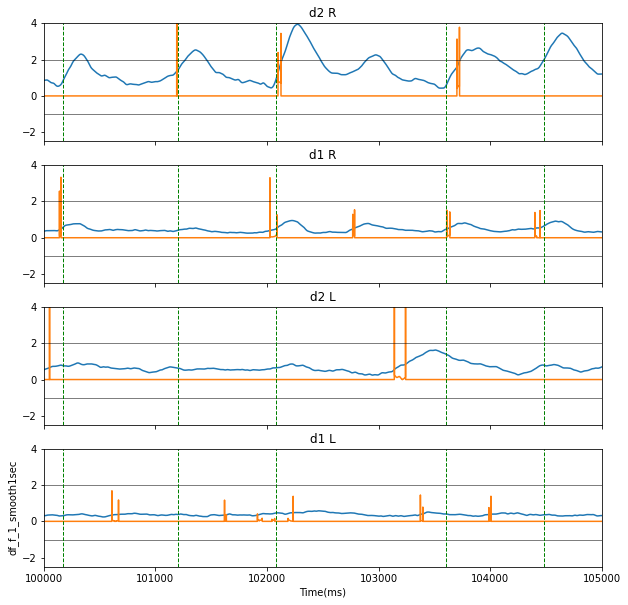

T163-181130 is being plotted


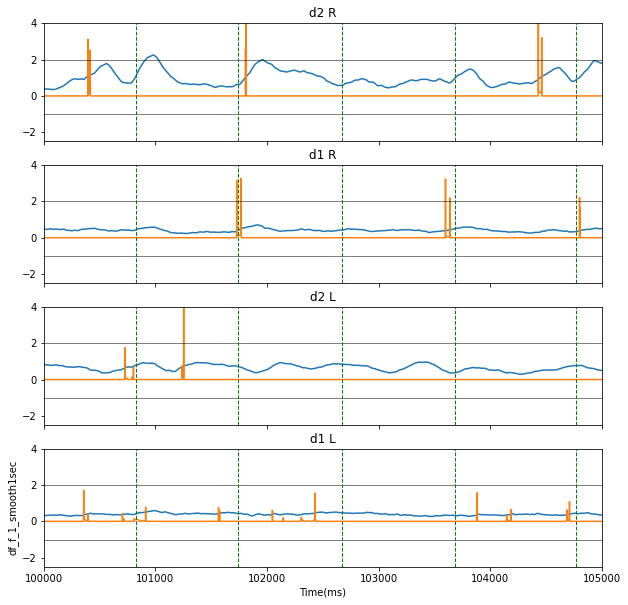

T163-181204 is being plotted


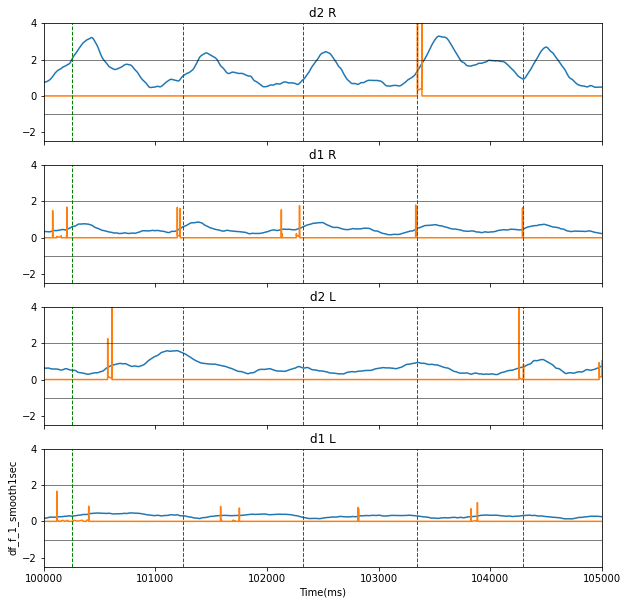

T163-181206 is being plotted


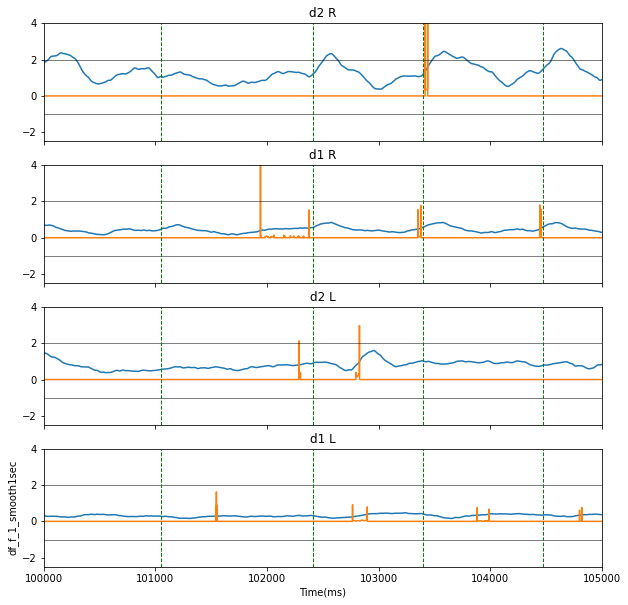

T163-181210 is being plotted


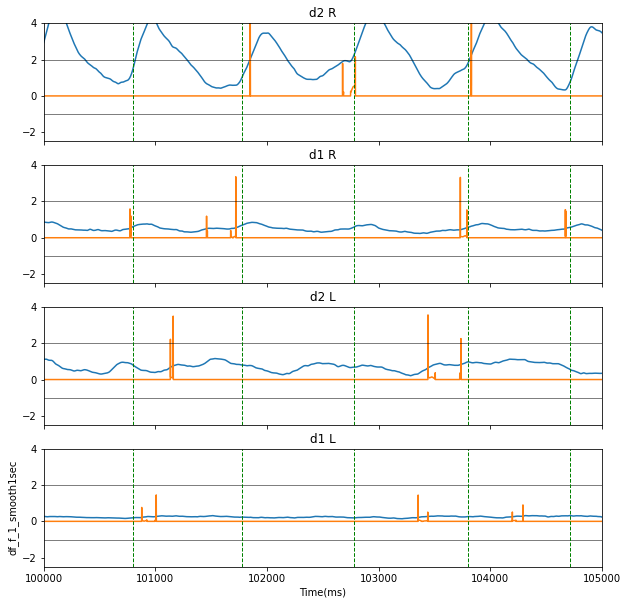

T163-181213 is being plotted


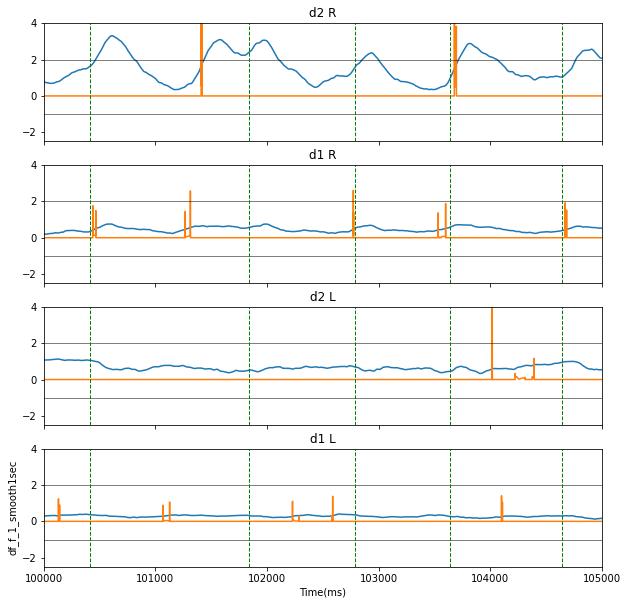

T164-181127 is being plotted


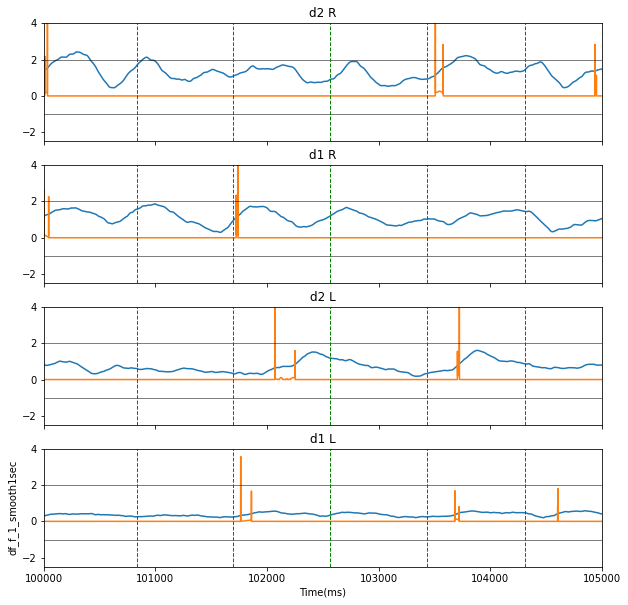

T164-181210 is being plotted


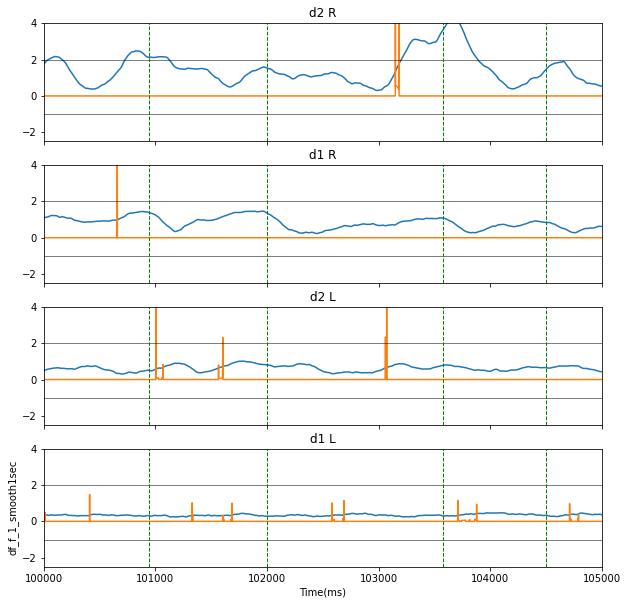

T164-181203 is being plotted


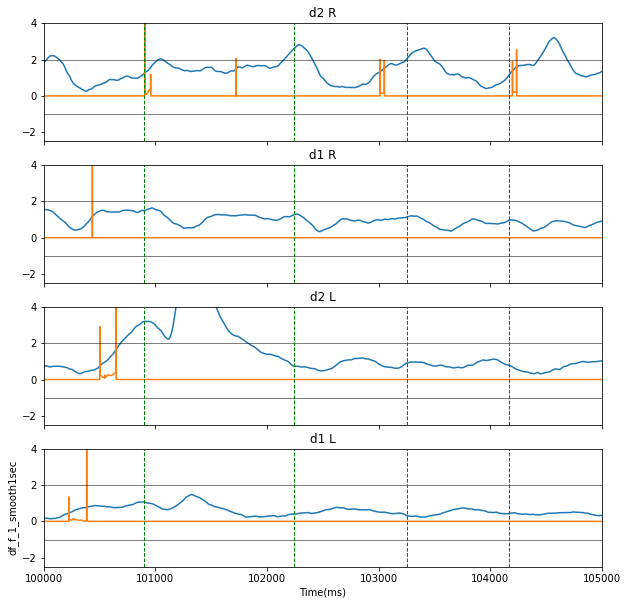

T164-181204 is being plotted


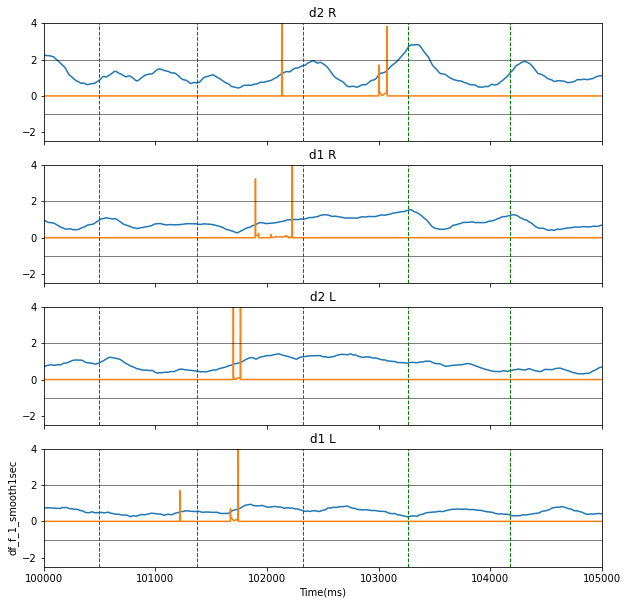

T164-181205 is being plotted


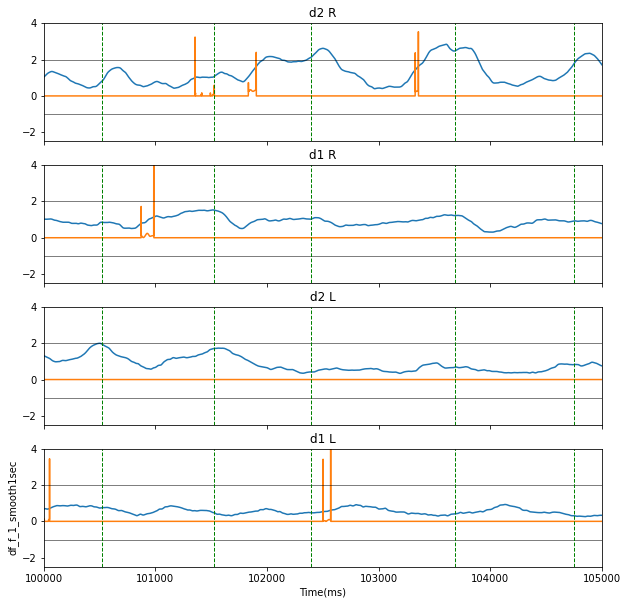

T164-181128 is being plotted


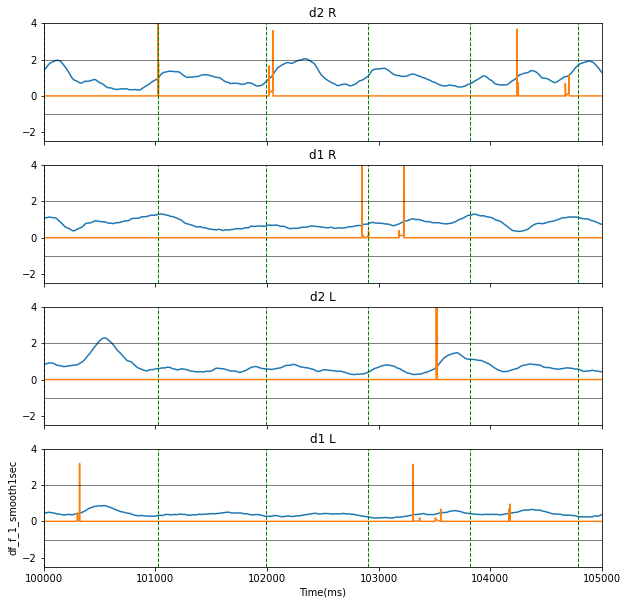

T164-181213 is being plotted


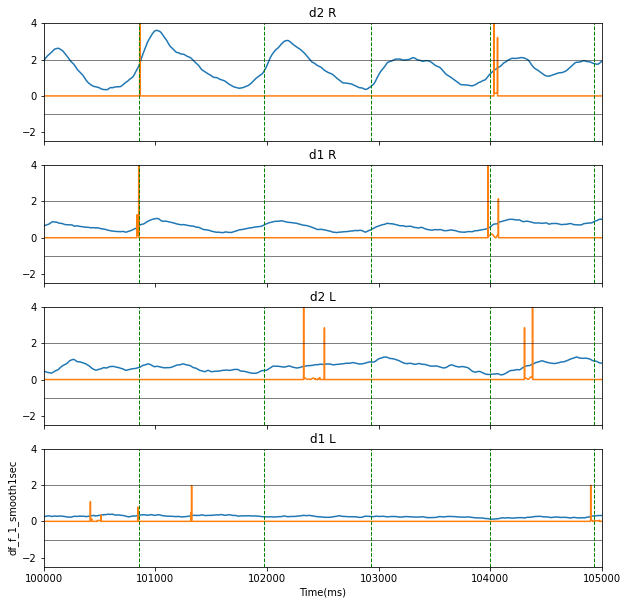

T169-190213 is being plotted


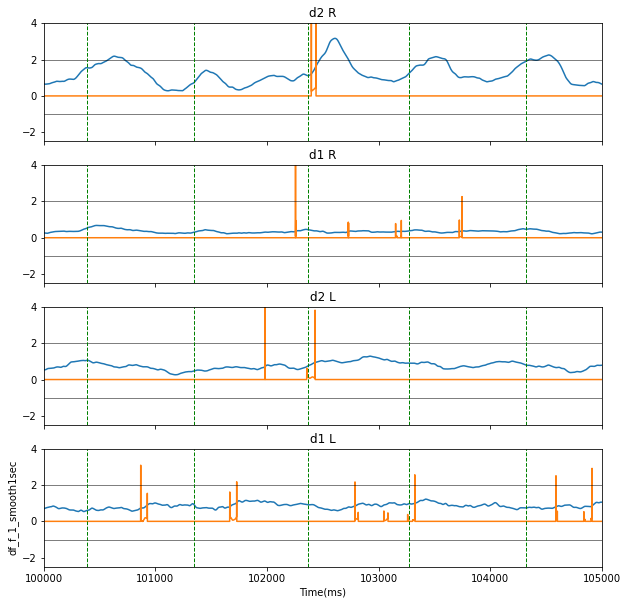

T169-190211 is being plotted


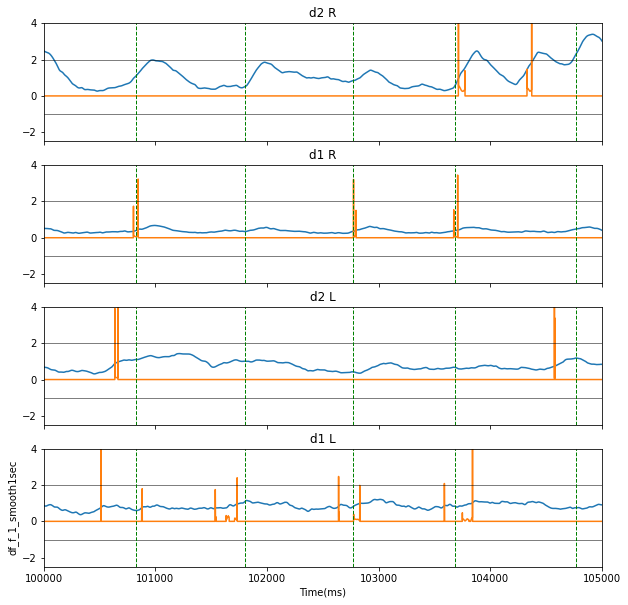

T169-190212 is being plotted


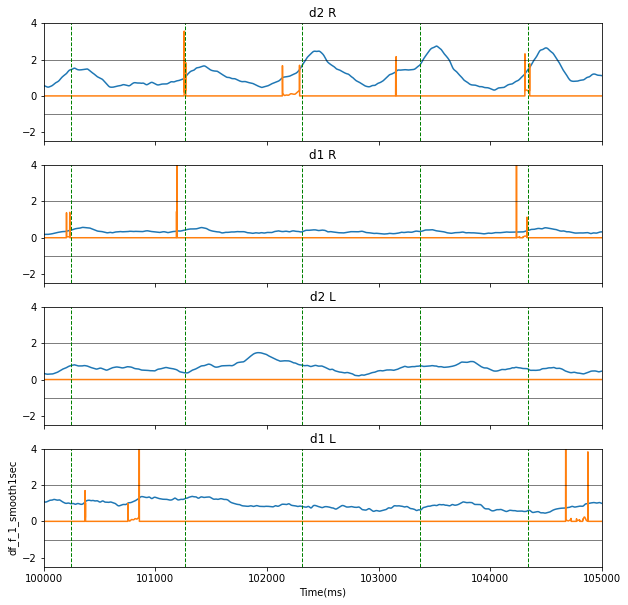

T169-190226 is being plotted


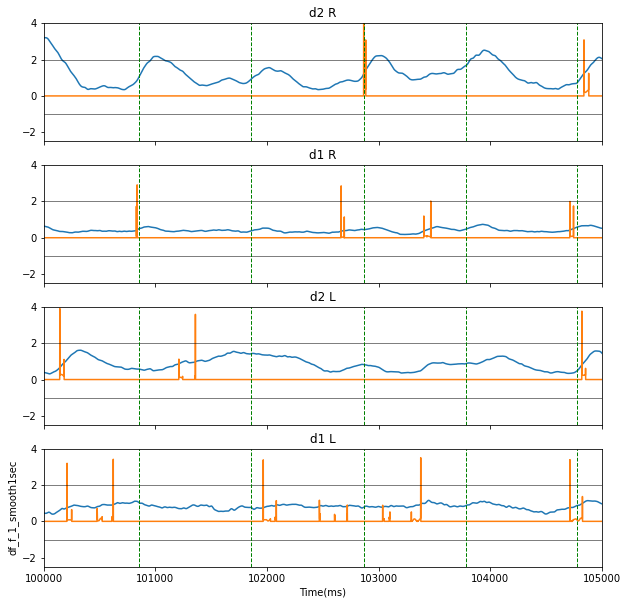

T169-190222 is being plotted


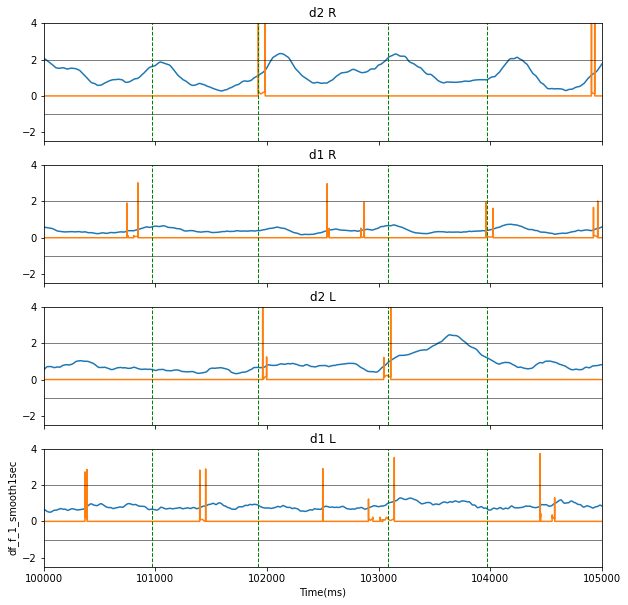

T169-190225 is being plotted


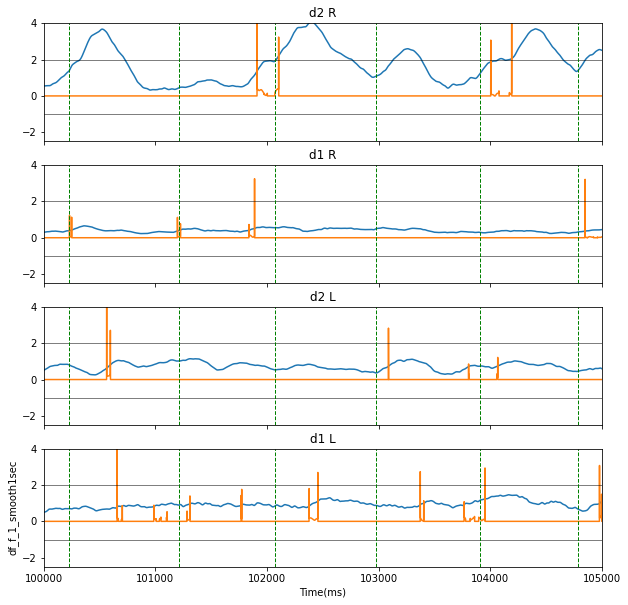

T169-190125 is being plotted


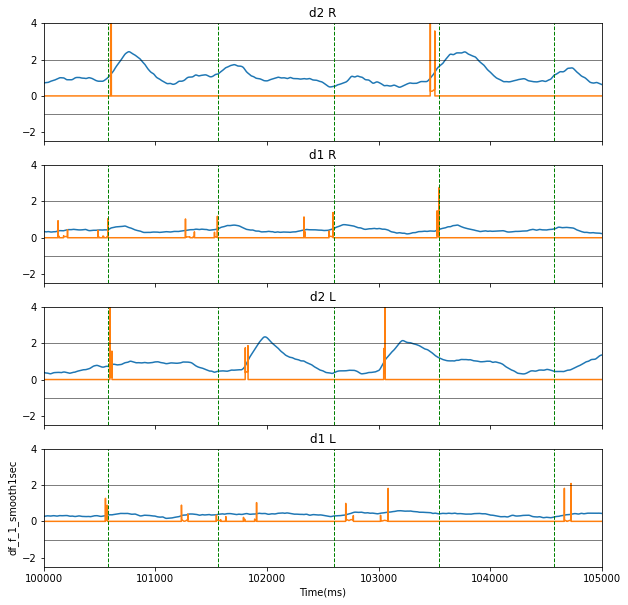

T169-190301 is being plotted


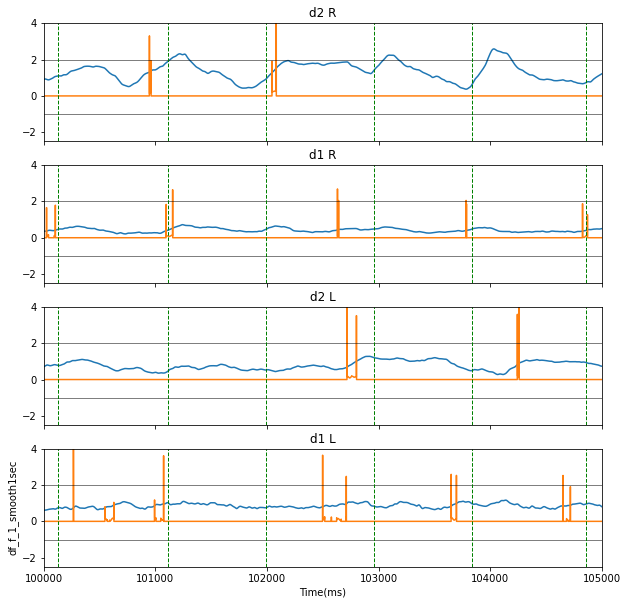

T169-190123 is being plotted


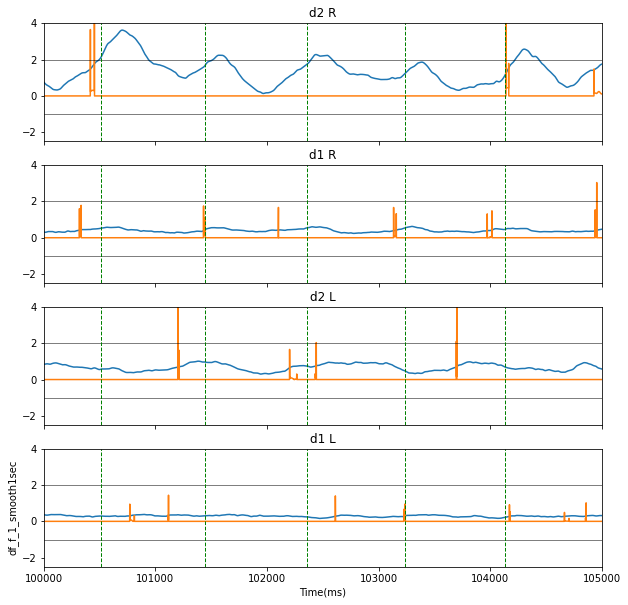

T169-190215 is being plotted


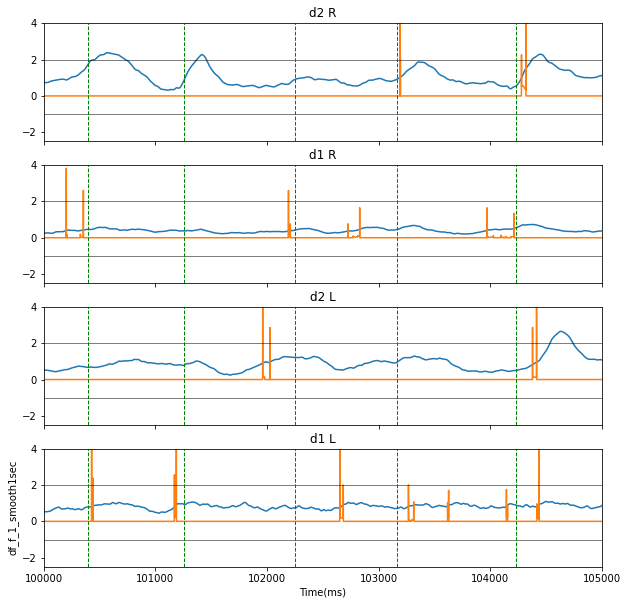

T169-190214 is being plotted


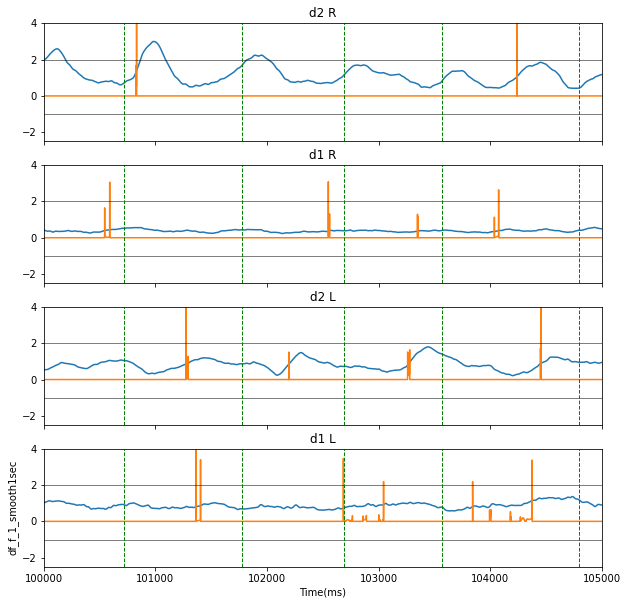

T169-190220 is being plotted


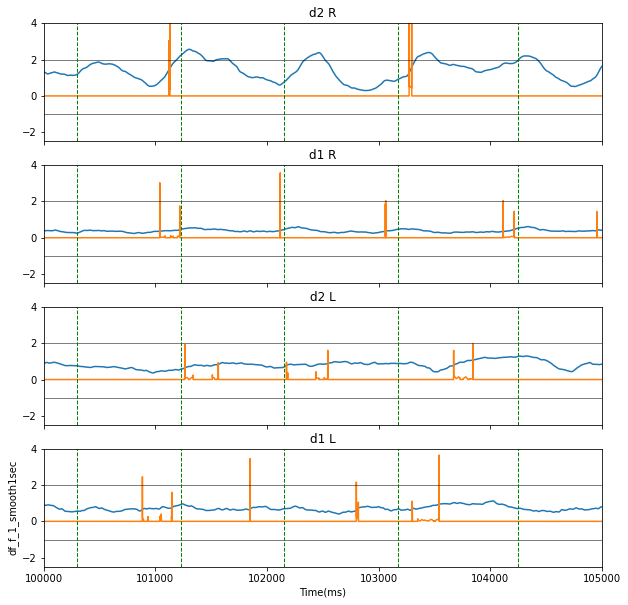

T169-190219 is being plotted


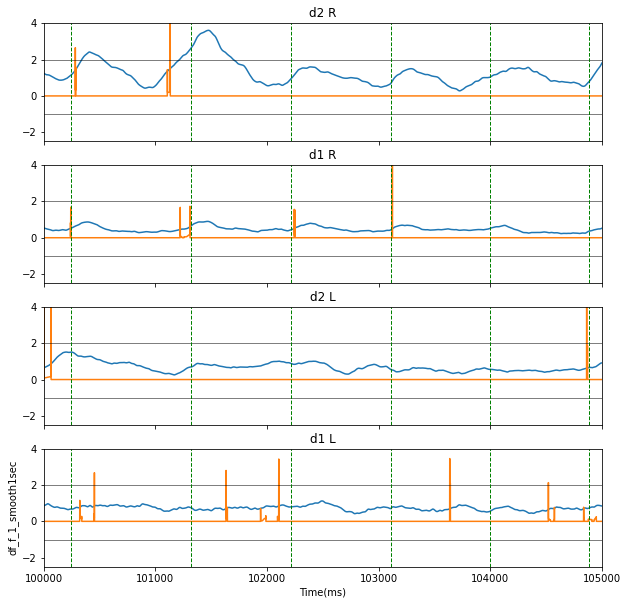

T169-190227 is being plotted


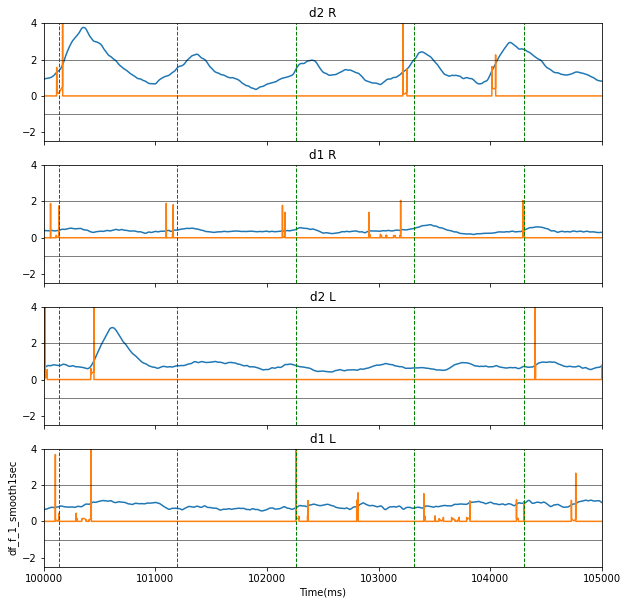

T169-190201 is being plotted


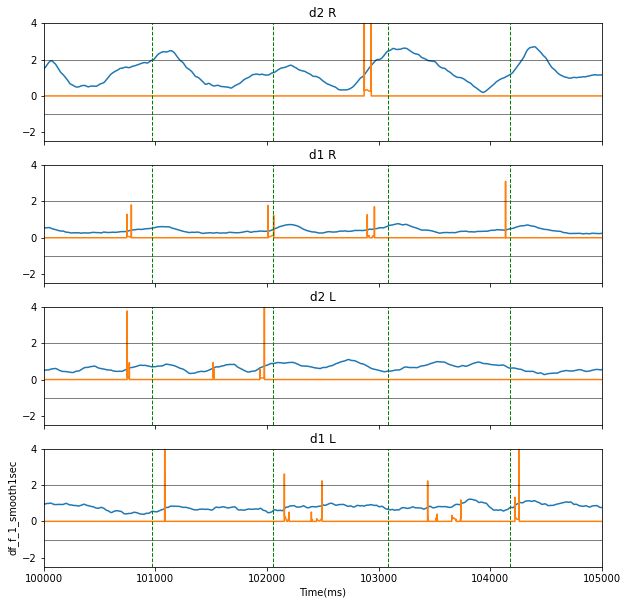

T169-190131 is being plotted


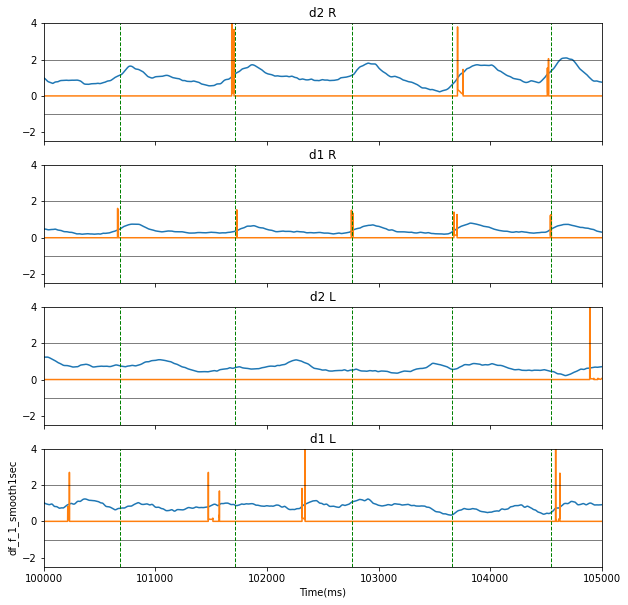

T169-190228 is being plotted


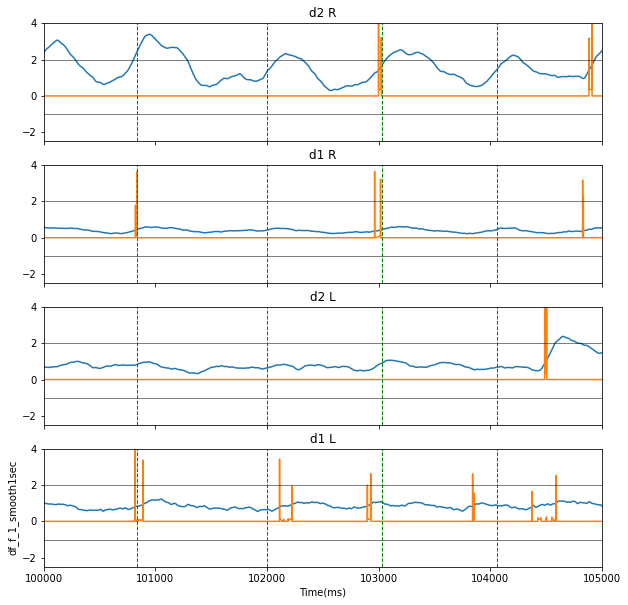

T169-190221 is being plotted


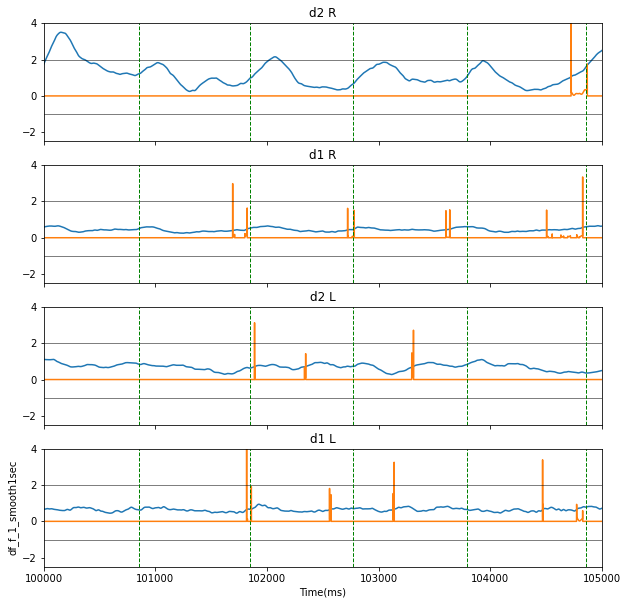

T171-190219 is being plotted


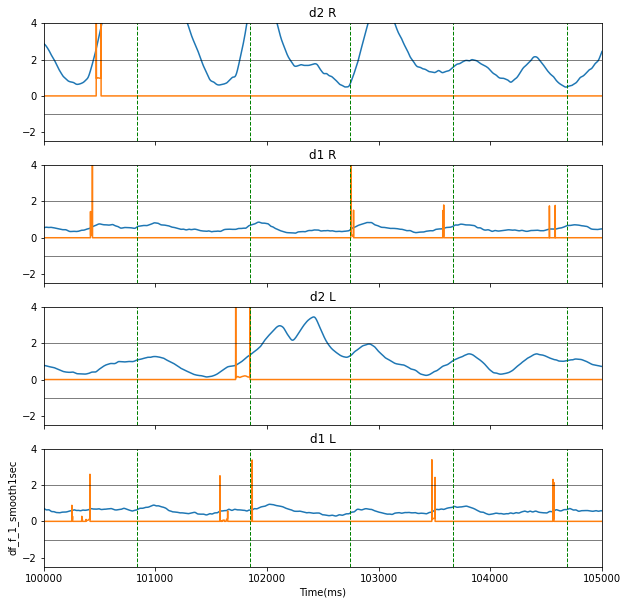

T171-190128 is being plotted


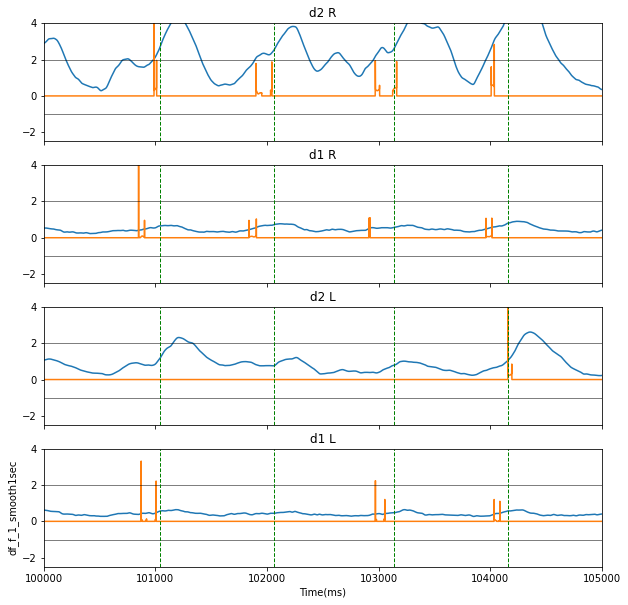

T171-190301 is being plotted


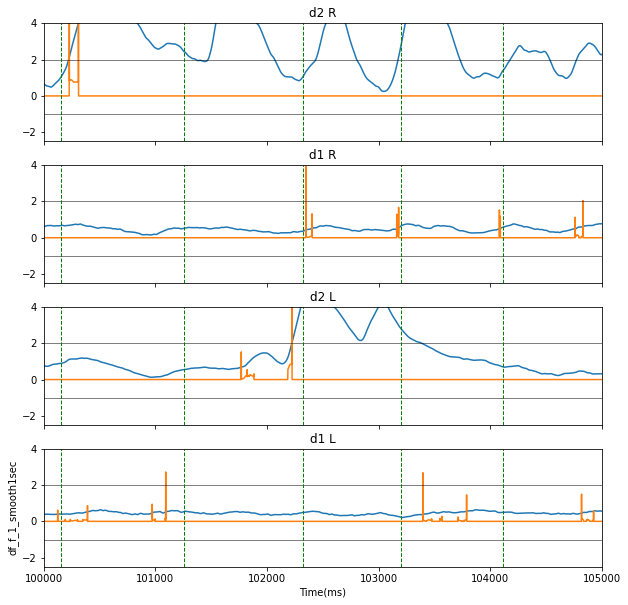

T171-190123 is being plotted


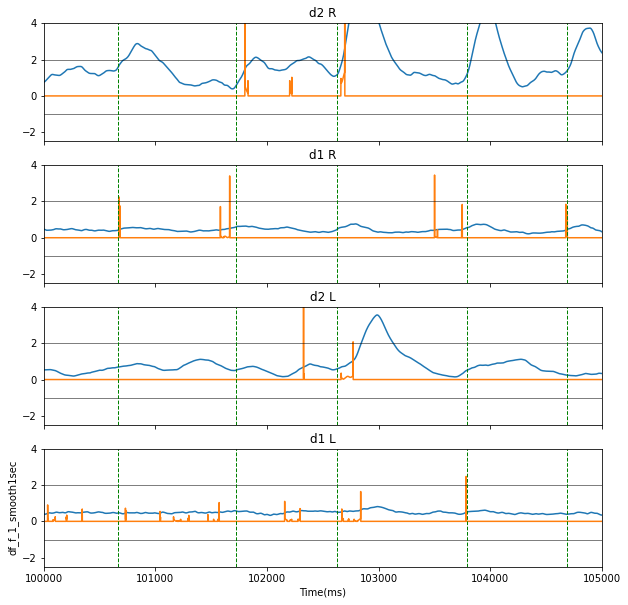

T171-190221 is being plotted


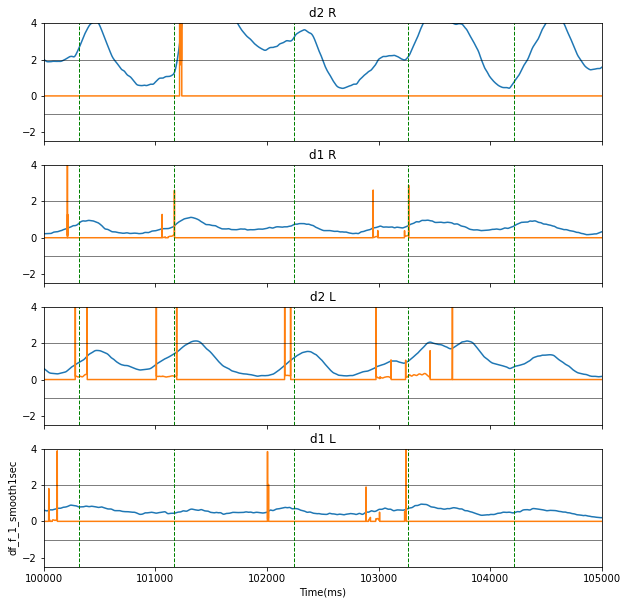

T171-190213 is being plotted


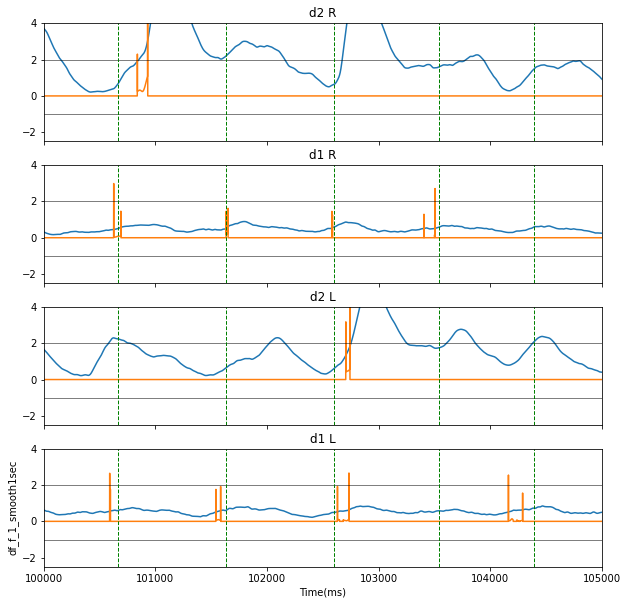

T171-190226 is being plotted


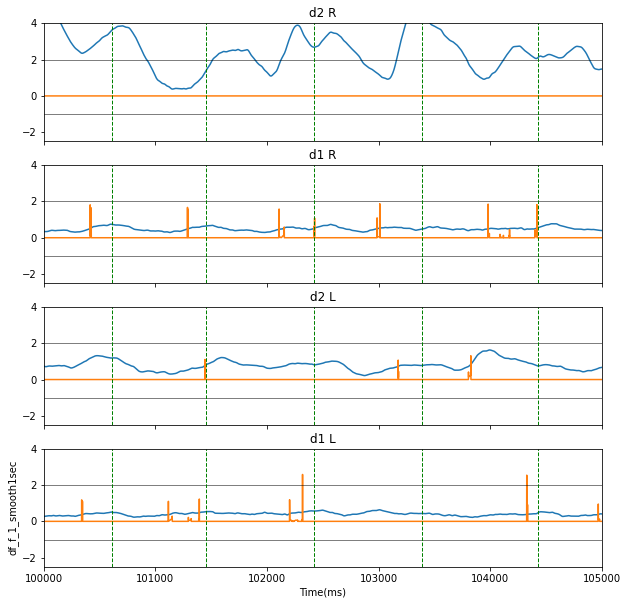

T171-190122 is being plotted


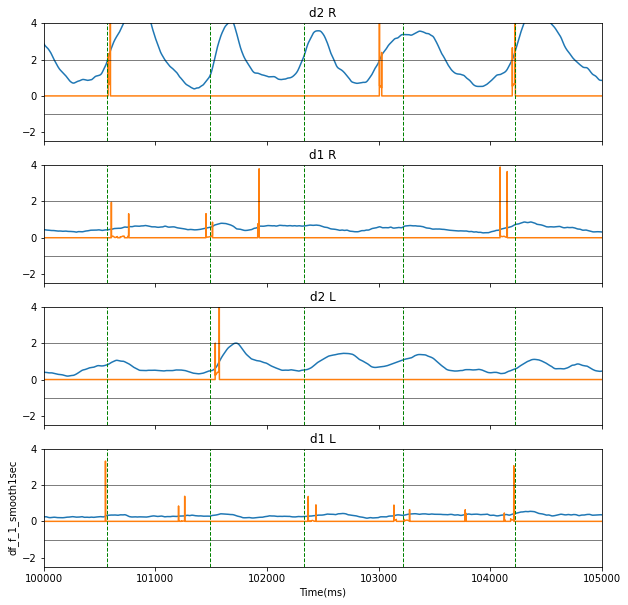

T171-190225 is being plotted


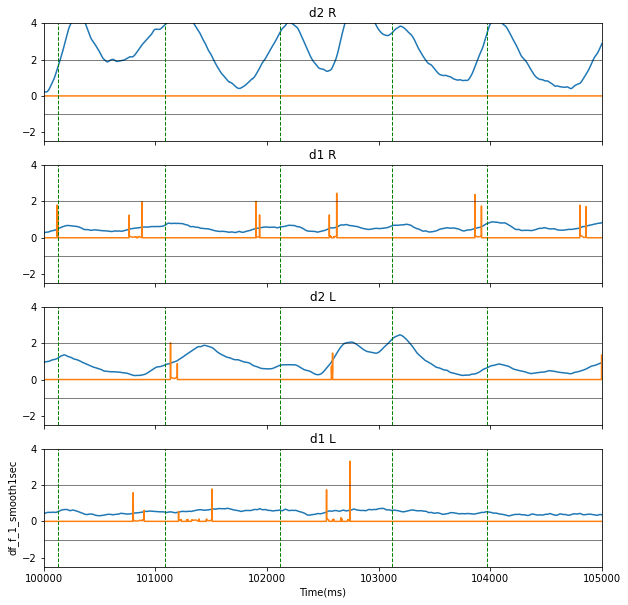

T171-190227 is being plotted


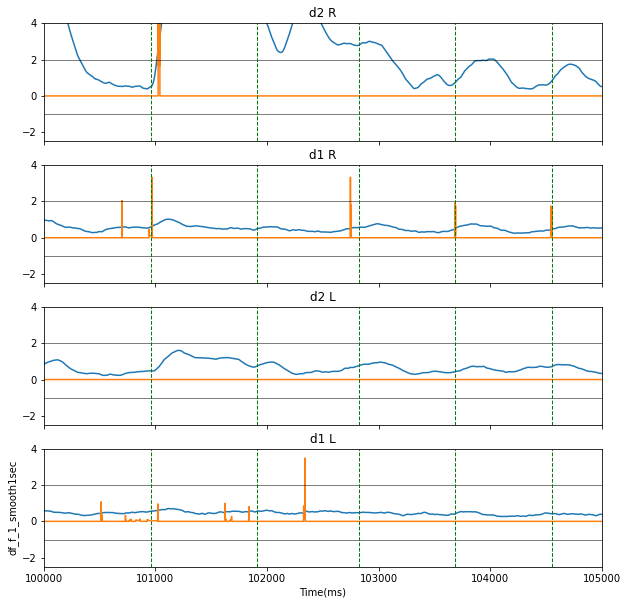

T171-190214 is being plotted


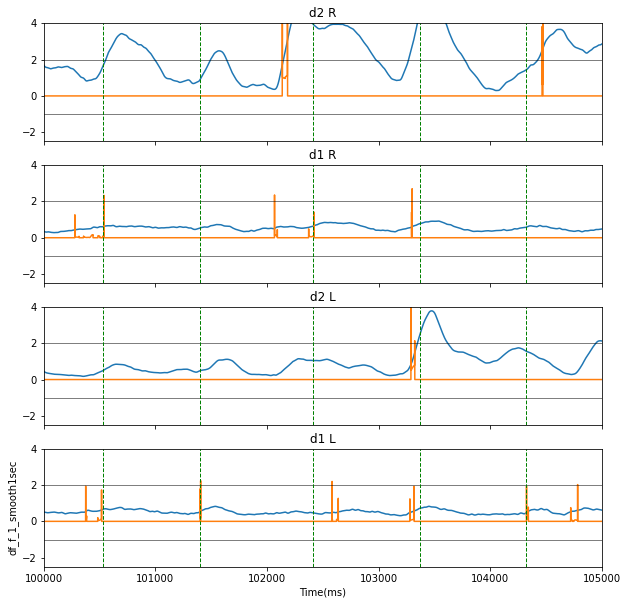

T171-190220 is being plotted


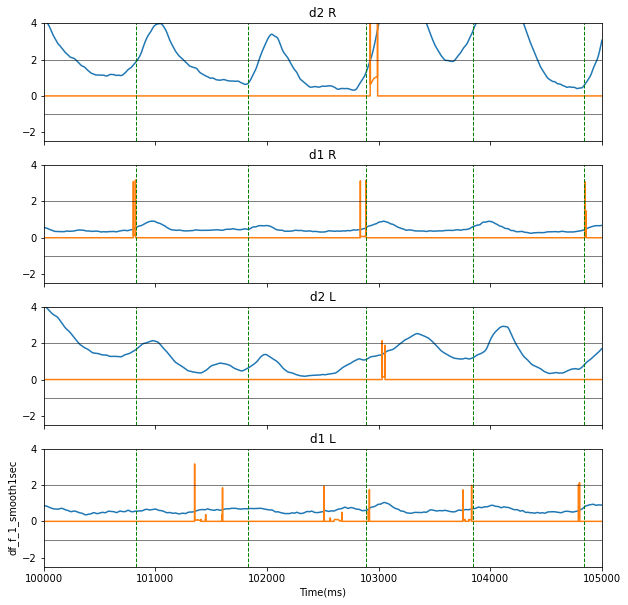

T171-190222 is being plotted


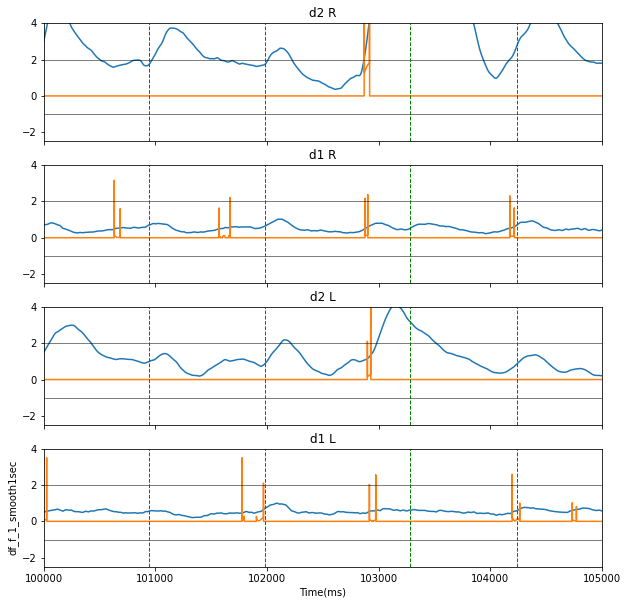

T171-190208 is being plotted


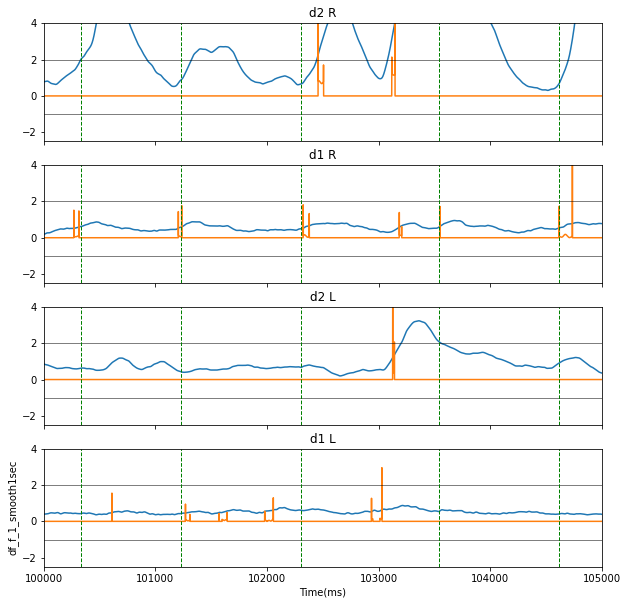

T171-190125 is being plotted


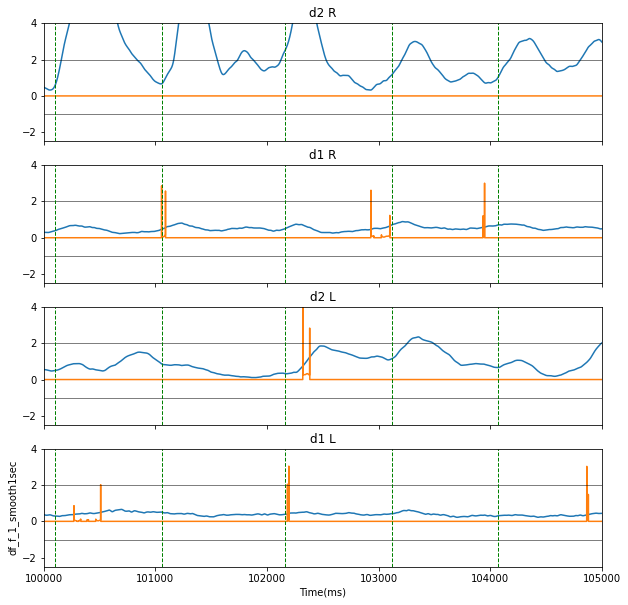

T171-190228 is being plotted


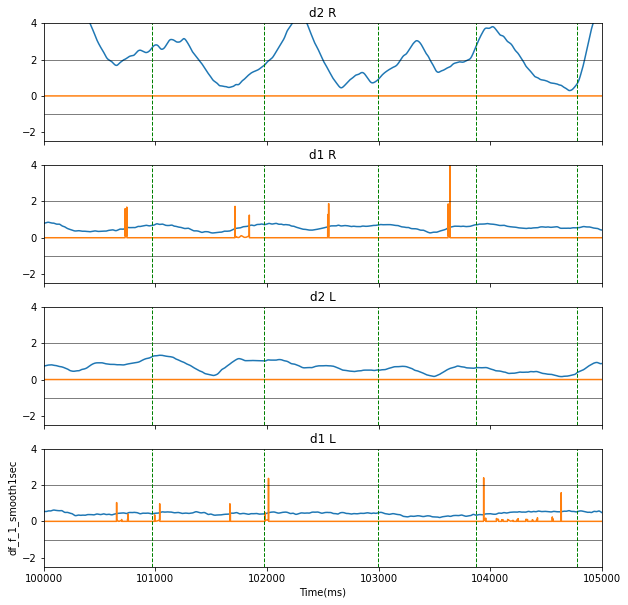

T171-190215 is being plotted


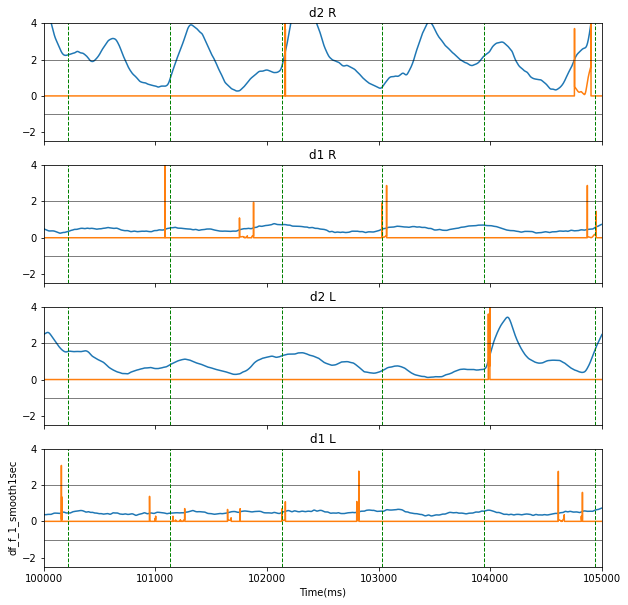

T171-190212 is being plotted


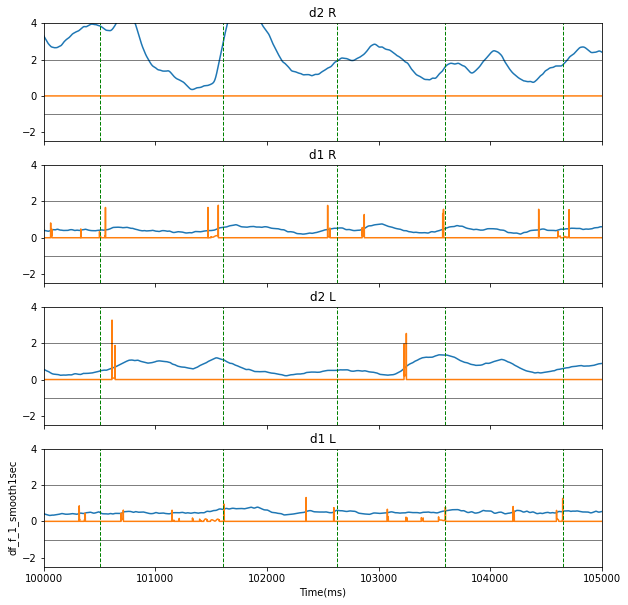

T171-190211 is being plotted


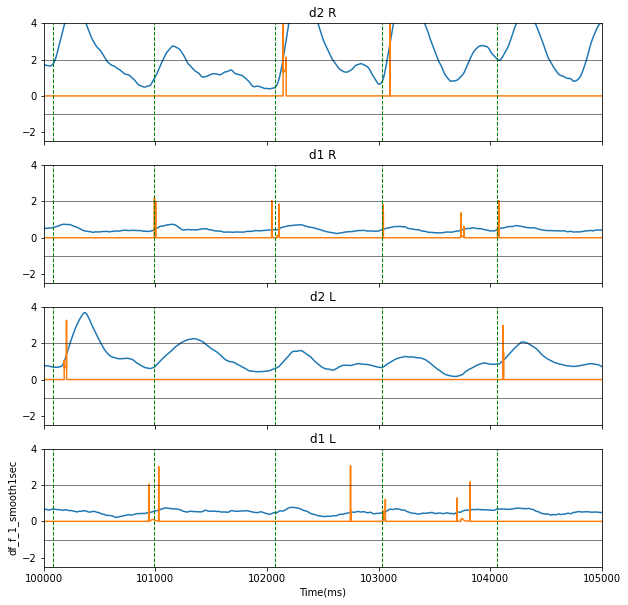

T171-190131 is being plotted


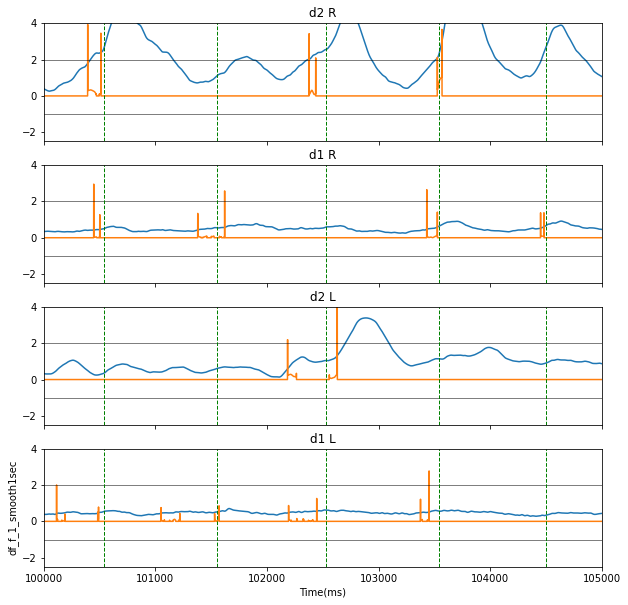

T171-190130 is being plotted


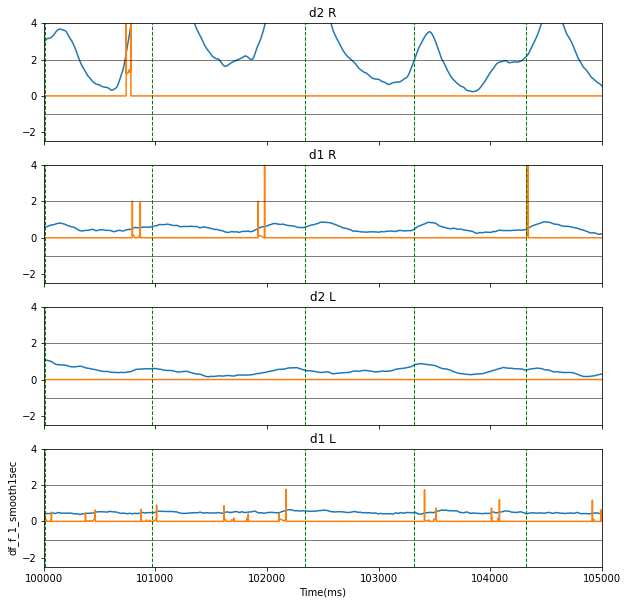

T186-190321 is being plotted


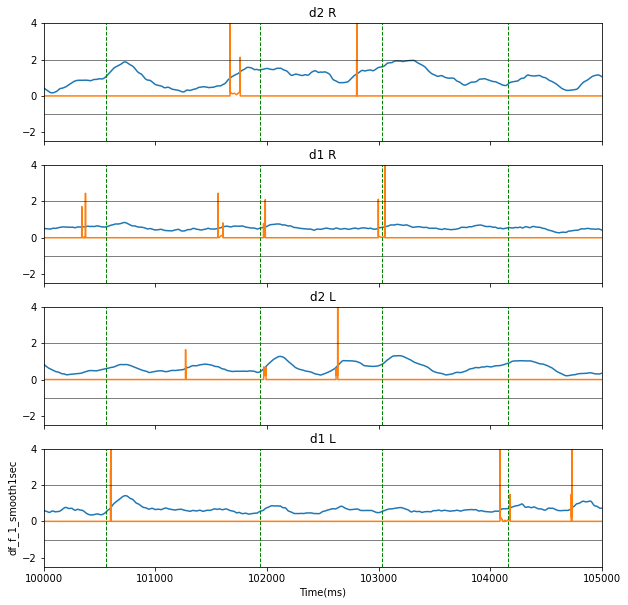

T186-190325 is being plotted


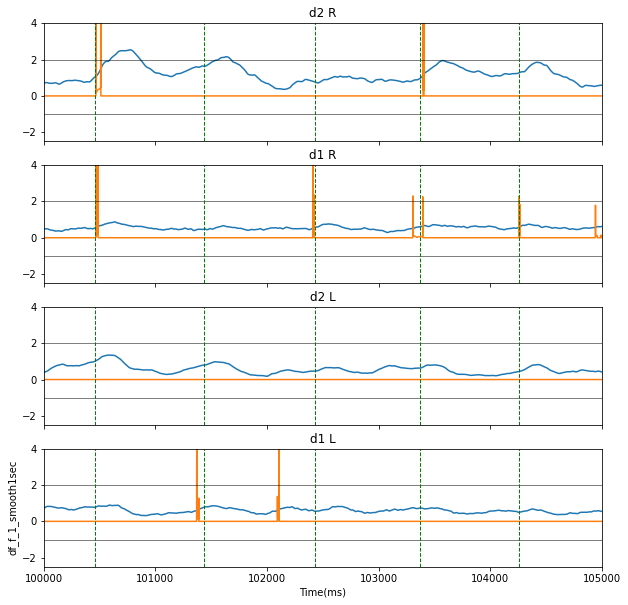

T186-190322 is being plotted


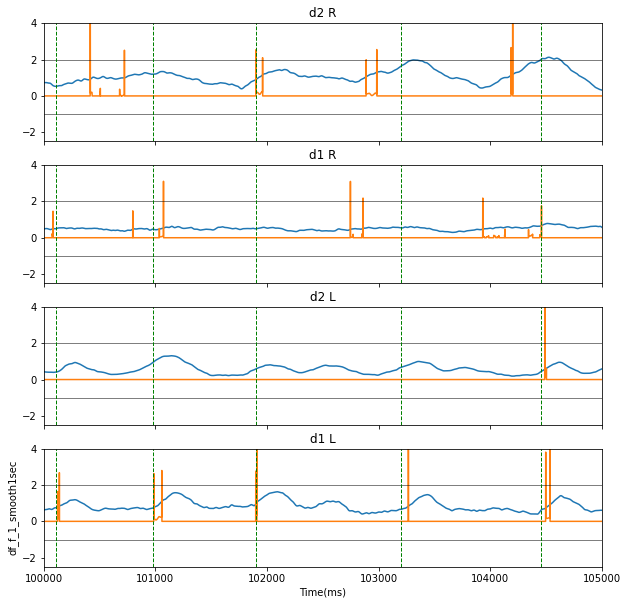

T186-190401 is being plotted


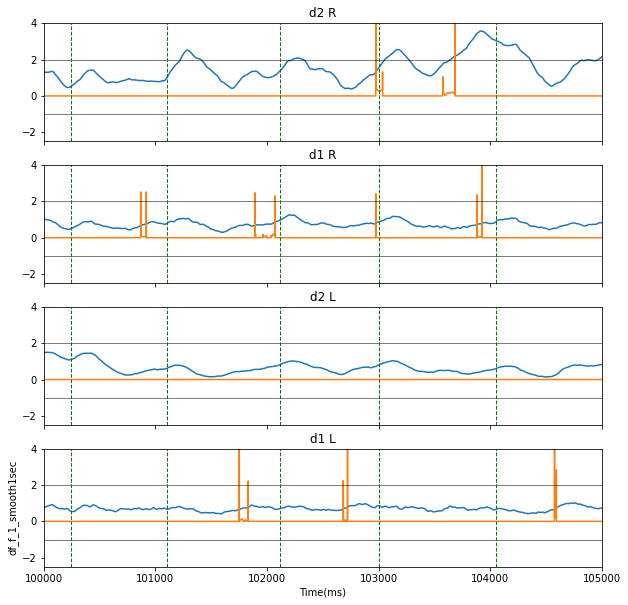

T186-190328 is being plotted


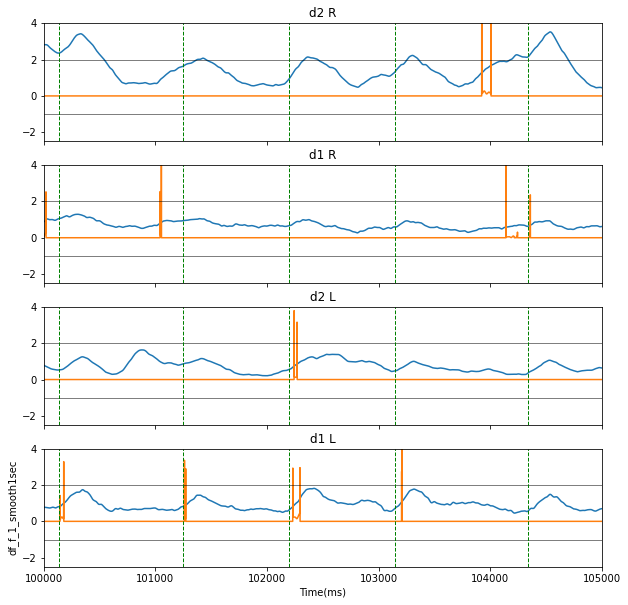

T186-190327 is being plotted


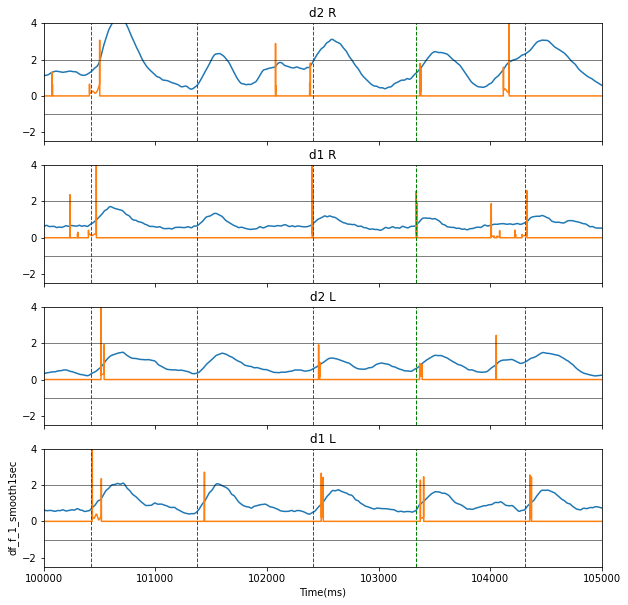

T186-190402 is being plotted


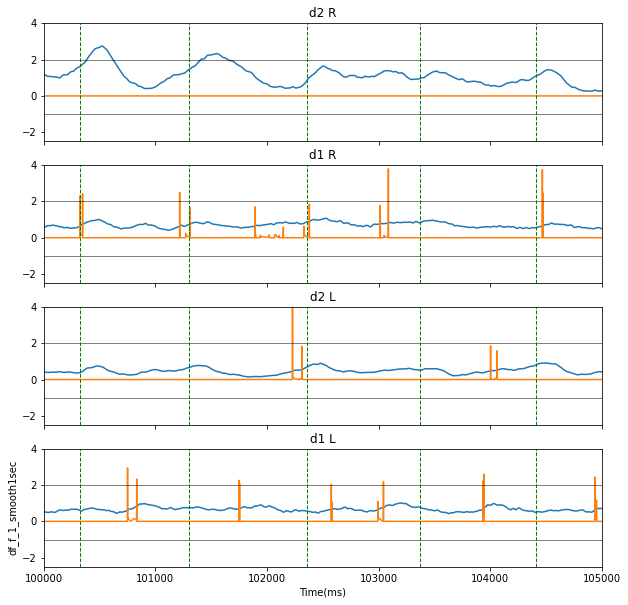

T186-190405 is being plotted


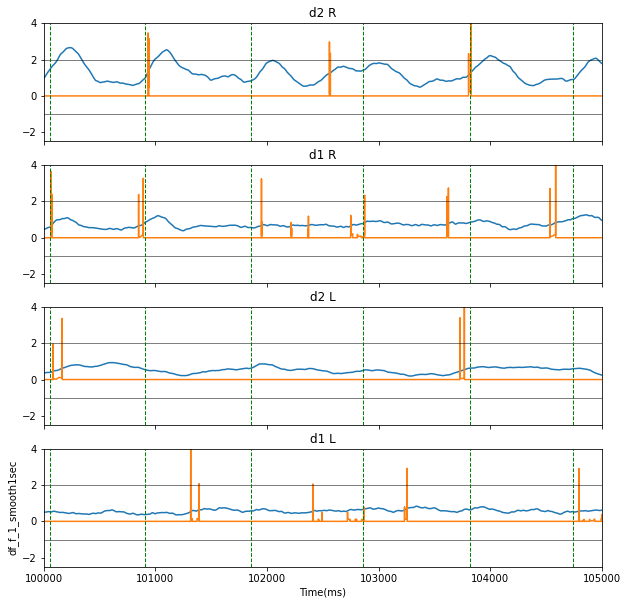

T187-190322 is being plotted


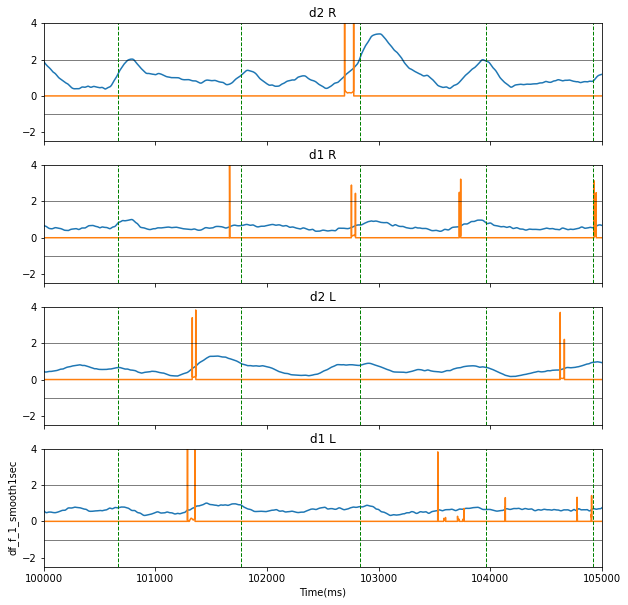

T187-190402 is being plotted


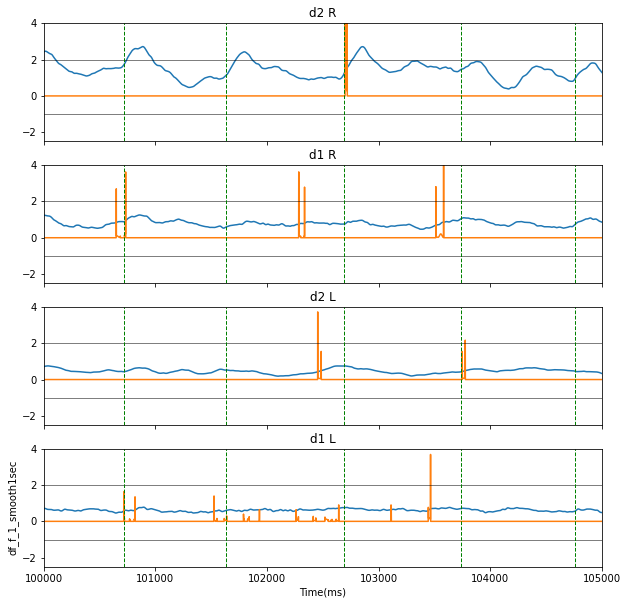

T187-190325 is being plotted


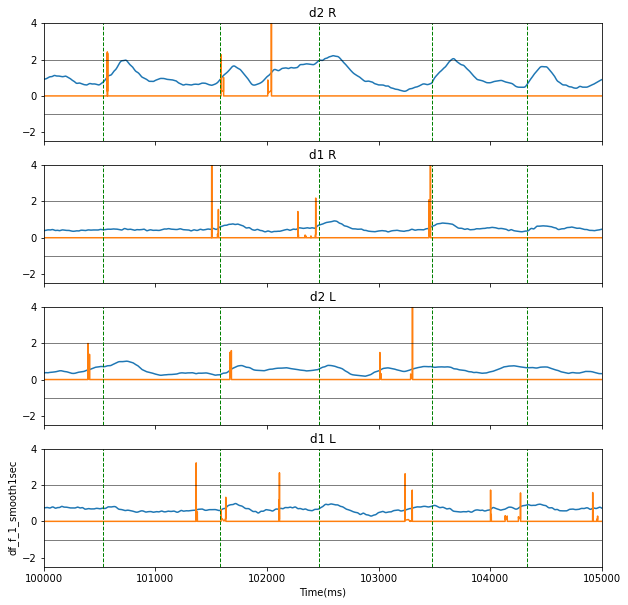

T187-190404 is being plotted


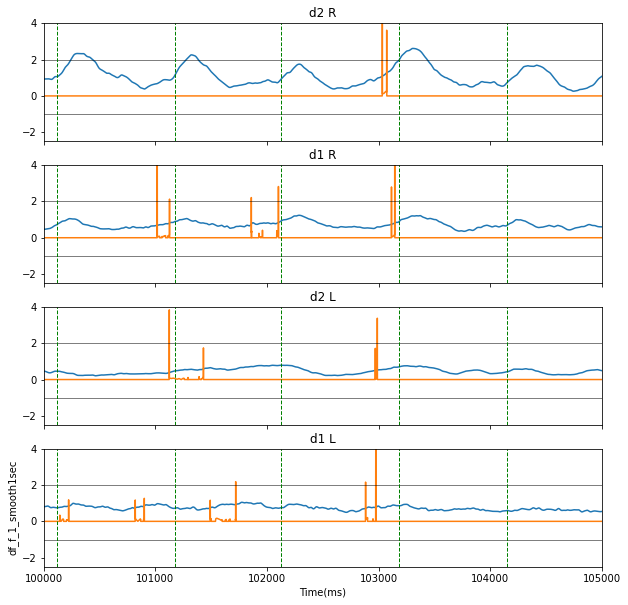

T187-190405 is being plotted


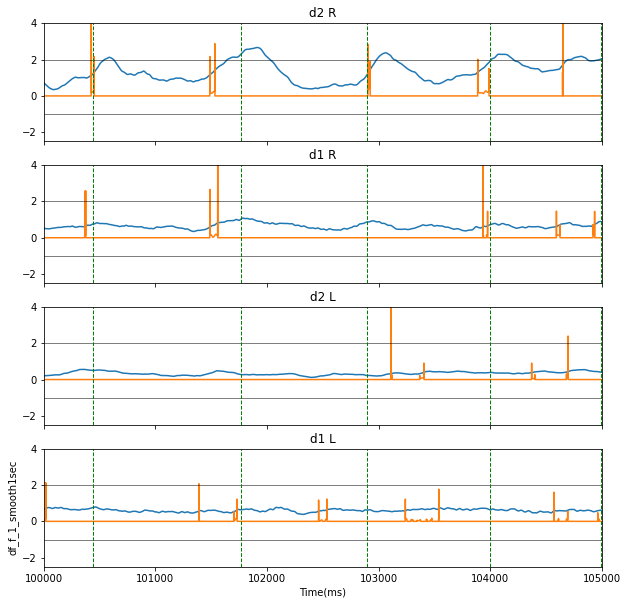

T187-190401 is being plotted


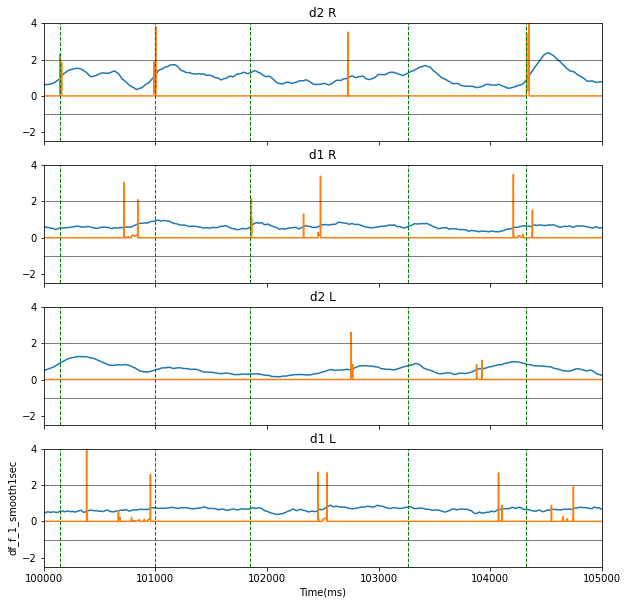

T187-190328 is being plotted


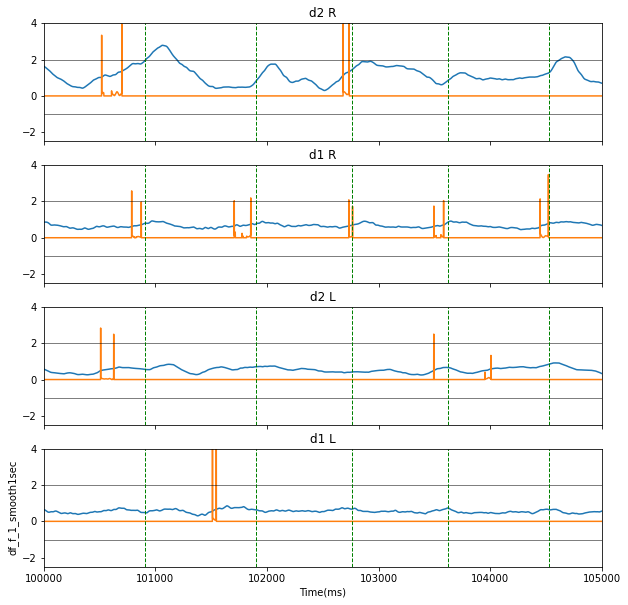

T187-190403 is being plotted


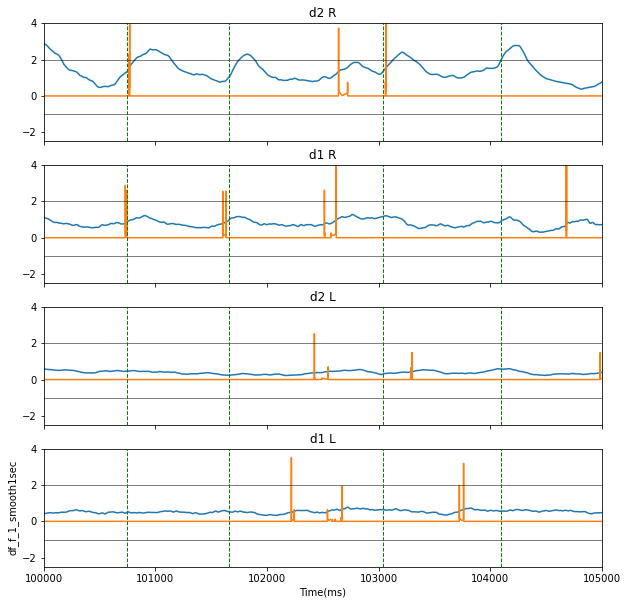

T202-190530 is being plotted


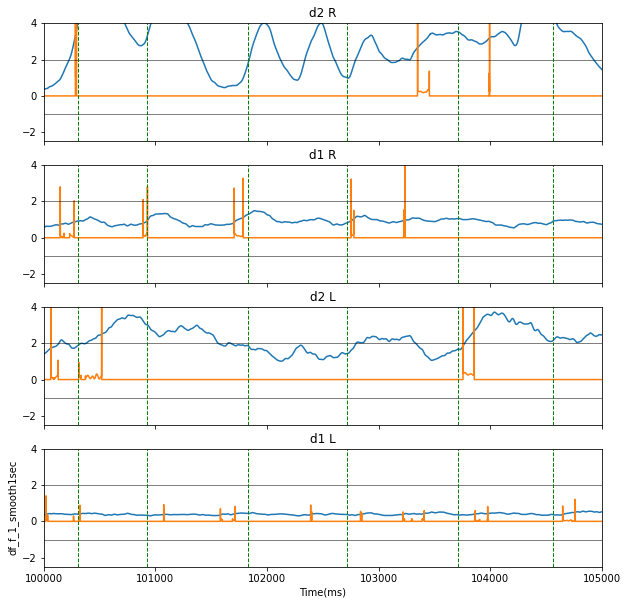

T202-190522 is being plotted


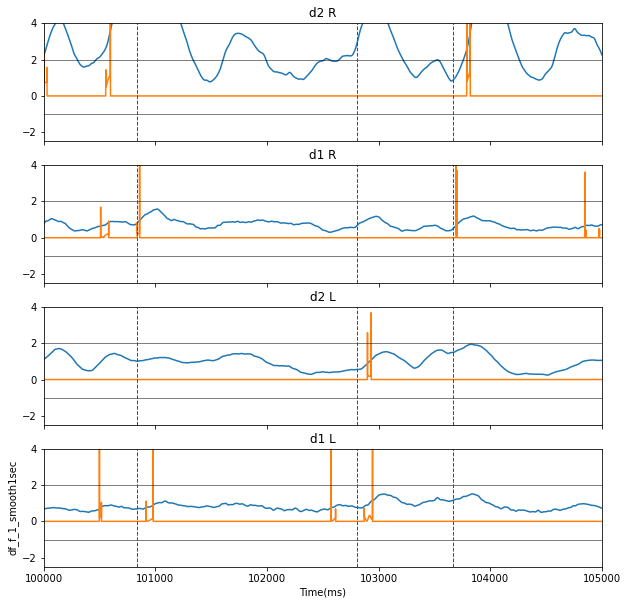

T202-190529 is being plotted


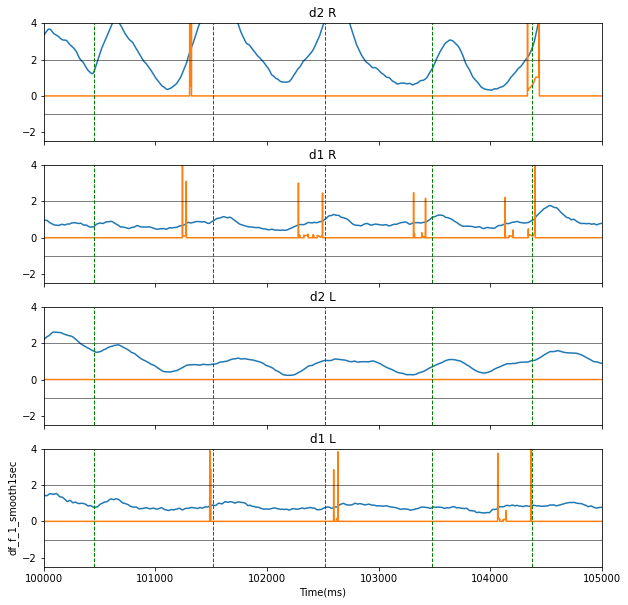

T202-190526 is being plotted


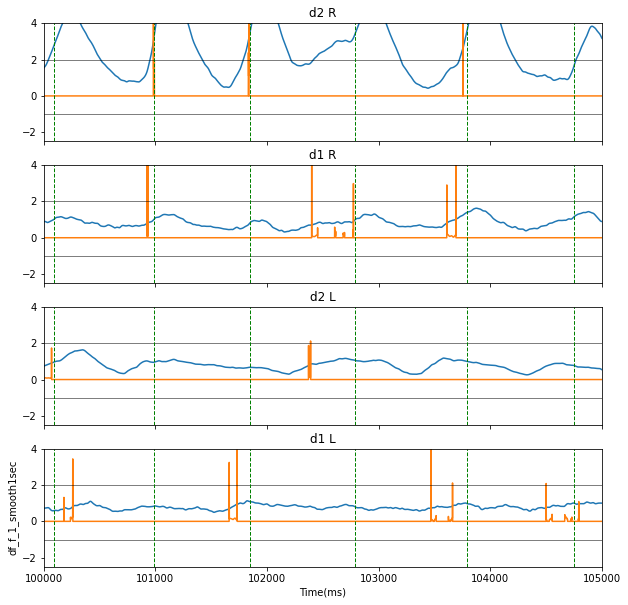

T202-190516 is being plotted


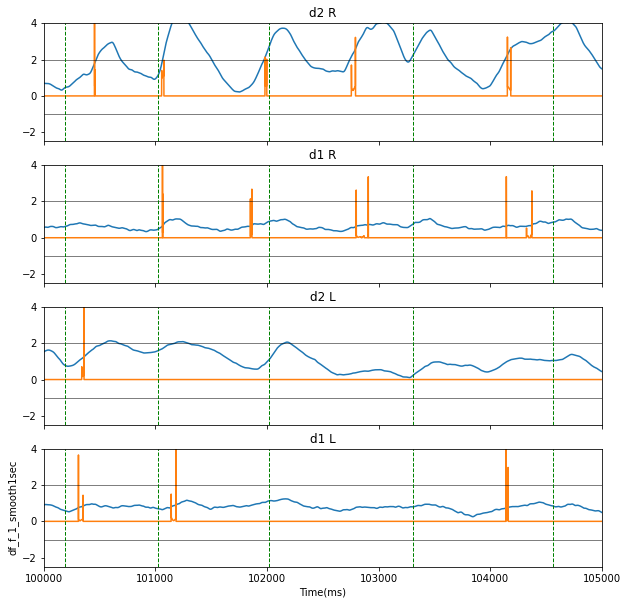

CPU times: user 8min 43s, sys: 30.5 s, total: 9min 13s
Wall time: 3min 7s


()

In [30]:
%%time
plot_cue_photo_per_session(data_set,session_date,state_Selection,keys)